## The attenuation over time of a single-frequency in the initial concentration

### The initial system state is a sine wave of frequency 2 (i.e. 2 cycles across the system's length), of amplitude 10, with a baseline (bias) of 30
### Afterward, the process is restarted and repeated with a frequency 5 times larger


LAST REVISED: June 4, 2023

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.life_1D.bio_sim_1d import BioSim1D

import plotly.express as px
import plotly.graph_objects as go

from src.modules.reactions.reaction_data import ChemData as chem

In [3]:
# Initialize the system.  We use a RELATIVELY LARGE NUMBER OF BINS, 
# to captures the finer changes in the frequency components of the concentration function
chem_data = chem(names=["A"], diffusion_rates=[0.5])
bio = BioSim1D(n_bins=500, chem_data=chem_data)

## Initial Preparation -
### Start with a sinusoidal concentration, with exactly 2 cycles over the length of the system
#### (of amplitude 10 and bias value of 30)

In [4]:
bio.inject_sine_conc(species_name="A", amplitude=10, bias=30, frequency=2)

In [5]:
bio.show_system_snapshot()

SYSTEM SNAPSHOT at time 0:
             A
0    30.000000
1    30.251301
2    30.502443
3    30.753268
4    31.003617
..         ...
495  28.746668
496  28.996383
497  29.246732
498  29.497557
499  29.748699

[500 rows x 1 columns]


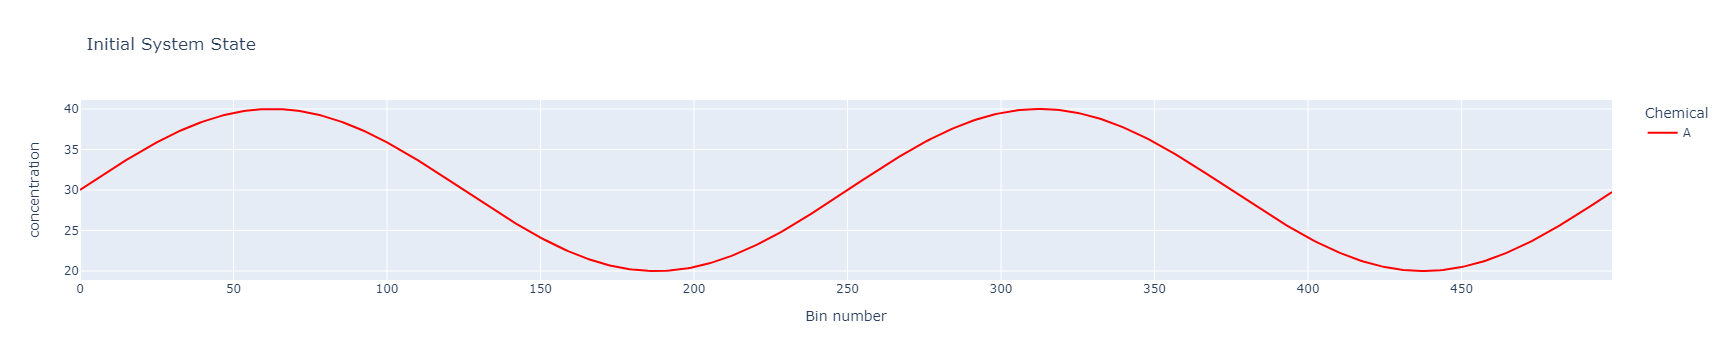

In [6]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Initial System State",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

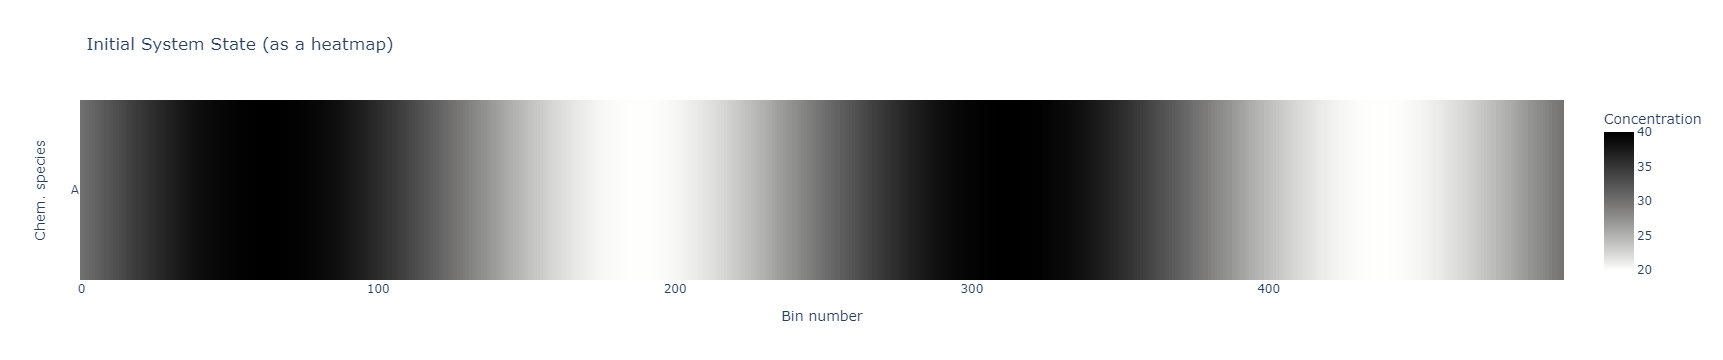

In [7]:
# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= "Initial System State (as a heatmap)", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r") 

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

In [8]:
# Take a look at the frequency domain of the concentration values
frequency_data = bio.frequency_analysis(species_name="A")
frequency_data

Frequency  Relative Amplitude
0        0.0                 3.0
1        2.0                 1.0

In [9]:
ratio = frequency_data.loc[1, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
ratio

0.3333333333333333

In [10]:
bio.add_snapshot(data_snapshot={"ratio": ratio})
bio.get_history()

SYSTEM TIME     ratio caption
0            0  0.333333

# Start the diffusion - to time t=10

In [11]:
bio.diffuse(total_duration=10, n_steps=100)

{'steps': 100}

In [12]:
# Take a look at the frequency domain of the concentration values
frequency_data = bio.frequency_analysis(species_name="A")
frequency_data

Frequency  Relative Amplitude
0          0.0       136826.215286
1          1.0            1.000000
2          2.0        45466.923974
3          3.0            2.992211
4          4.0            3.980559
..         ...                 ...
246      246.0           11.415221
247      247.0           11.413727
248      248.0           11.412659
249      249.0           11.412018
250      250.0           11.411805

[251 rows x 2 columns]

In [13]:
ratio = frequency_data.loc[2, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
ratio

0.33229687657832013

In [14]:
bio.add_snapshot(data_snapshot={"ratio": ratio})
bio.get_history()

SYSTEM TIME     ratio caption
0          0.0  0.333333        
1         10.0  0.332297

## Do 49 more rounds of diffusion - to time t = 500

In [15]:
for i in range(49):
    bio.diffuse(total_duration=10, n_steps=100)
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[2, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

In [16]:
bio.get_history()

SYSTEM TIME     ratio caption
0           0.0  0.333333        
1          10.0  0.332297        
2          20.0  0.331275        
3          30.0  0.330264        
4          40.0  0.329262        
5          50.0  0.328268        
6          60.0  0.327283        
7          70.0  0.326304        
8          80.0  0.325332        
9          90.0  0.324367        
10        100.0  0.323409        
11        110.0  0.322456        
12        120.0  0.321510        
13        130.0  0.320569        
14        140.0  0.319634        
15        150.0  0.318705        
16        160.0  0.317781        
17        170.0  0.316862        
18        180.0  0.315948        
19        190.0  0.315040        
20        200.0  0.314137        
21        210.0  0.313238        
22        220.0  0.312345        
23        230.0  0.311456        
24        240.0  0.310572        
25        250.0  0.309692        
26        260.0  0.308817        
27        270.0  0.307947        
28        280.0  0.307081        
29        290.0  0.306219        
30        300.0  0.305362        
31        310.0  0.304509        
32        320.0  0.303660        
33        330.0  0.302816        
34        340.0  0.301976        
35        350.0  0.301139        
36        360.0  0.300307        
37        370.0  0.299479        
38        380.0  0.298655        
39        390.0  0.297835        
40        400.0  0.297018        
41        410.0  0.296206        
42        420.0  0.295397        
43        430.0  0.294592        
44        440.0  0.293791        
45        450.0  0.292994        
46        460.0  0.292200        
47        470.0  0.291410        
48        480.0  0.290624        
49        490.0  0.289841        
50        500.0  0.289062

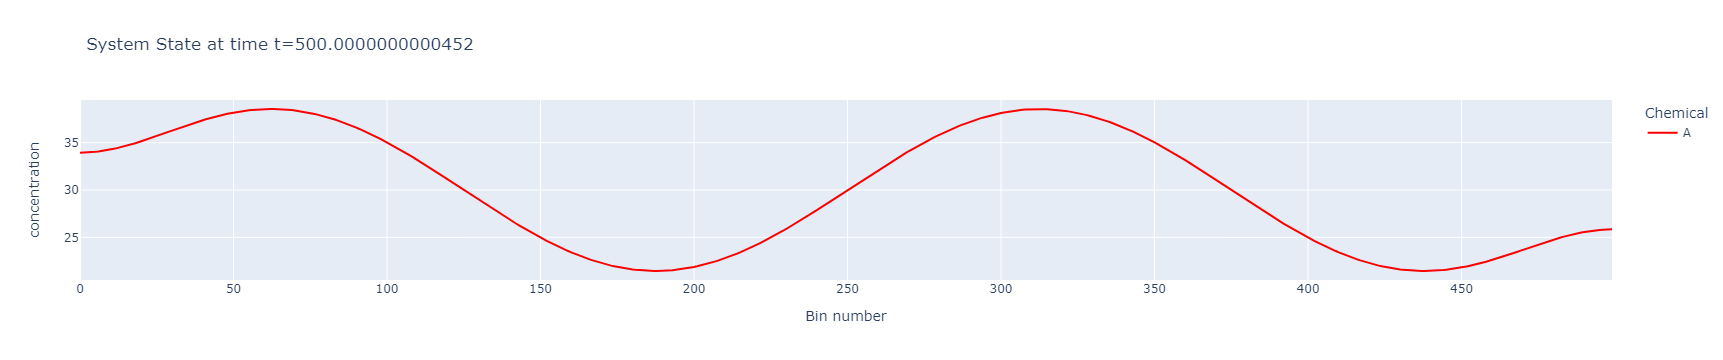

In [17]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"System State at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

#### Note how the curve is beginning to flatten; the peaks are no longer between 20 and 40

## Do 150 more rounds of diffusion - to time t = 2000

In [18]:
for i in range(150):
    bio.diffuse(total_duration=10, n_steps=75)    # Notice the gradual decreas of the number of intermediate steps, given the smaller gradient
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[2, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

In [19]:
bio.get_history()

SYSTEM TIME     ratio caption
0            0.0  0.333333        
1           10.0  0.332297        
2           20.0  0.331275        
3           30.0  0.330264        
4           40.0  0.329262        
..           ...       ...     ...
196       1960.0  0.203404        
197       1970.0  0.202963        
198       1980.0  0.202523        
199       1990.0  0.202085        
200       2000.0  0.201648        

[201 rows x 3 columns]

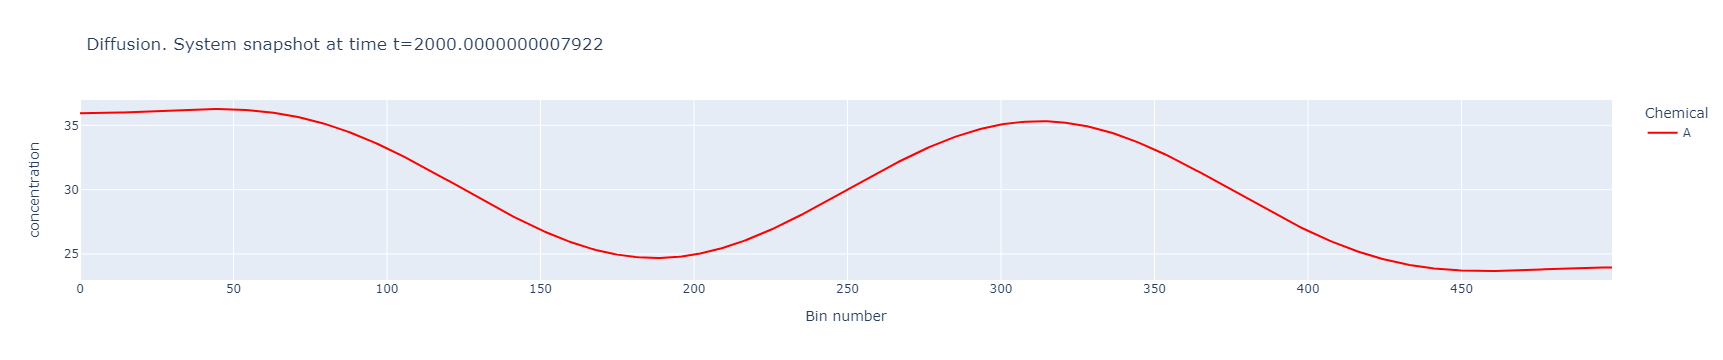

In [20]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

#### Note how the curve is flatter still - and even beginning to lose shape at the boundary 

## Do 800 more rounds of diffusion - to time t = 10000

In [21]:
for i in range(800):
    bio.diffuse(total_duration=10, n_steps=20)   # Note how we're gradually increasing the time steps, because the gradiants are now smaller
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[2, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

In [22]:
bio.get_history()

SYSTEM TIME     ratio caption
0             0.0  0.333333        
1            10.0  0.332297        
2            20.0  0.331275        
3            30.0  0.330264        
4            40.0  0.329262        
...           ...       ...     ...
996        9960.0  0.062422        
997        9970.0  0.062358        
998        9980.0  0.062295        
999        9990.0  0.062232        
1000      10000.0  0.062168        

[1001 rows x 3 columns]

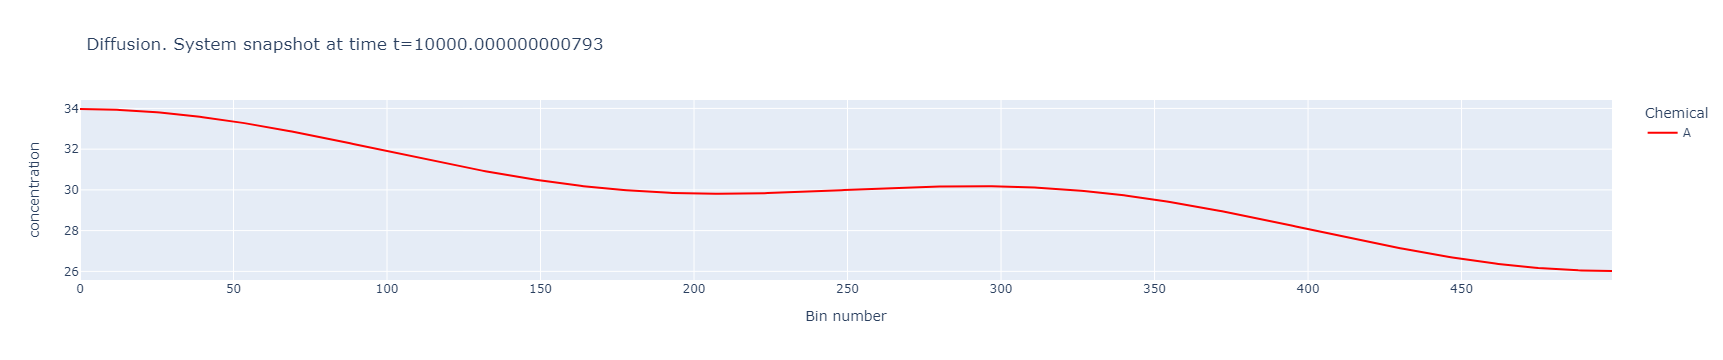

In [23]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
          title= f"Diffusion. System snapshot at time t={bio.system_time}",
          color_discrete_sequence = ['red'],
          labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

#### Getting decisively flatter, as it approaches equilibrium

## Now, let's look how the amplitude of the sine signal, relative to the constant bias, changed over time

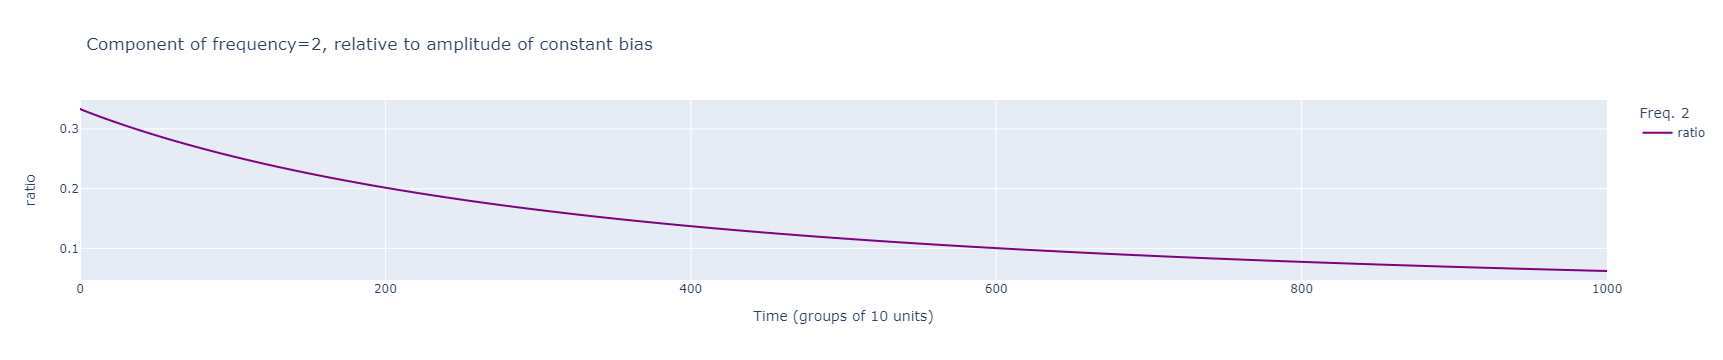

In [24]:
fig = px.line(data_frame=bio.get_history(), y=["ratio"], 
          title= "Component of frequency=2, relative to amplitude of constant bias",
          color_discrete_sequence = ['purple'],
          labels={"value":"ratio", "variable":"Freq. 2", "index":"Time (groups of 10 units)"})
fig.show()

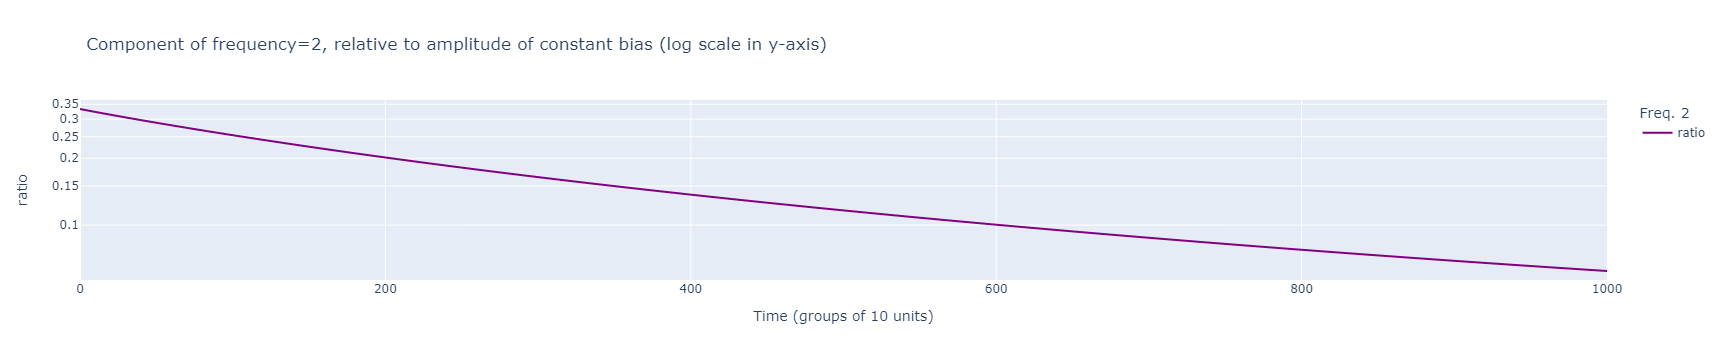

In [25]:
fig = px.line(data_frame=bio.get_history(), y=["ratio"], 
              title= "Component of frequency=2, relative to amplitude of constant bias (log scale in y-axis)",
              color_discrete_sequence = ['purple'],
              labels={"value":"ratio", "variable":"Freq. 2", "index":"Time (groups of 10 units)"},
              log_y=True)
fig.show()

In [26]:
saved_freq_2_df = bio.get_history().copy(deep=True)   # Save the whole dataframe, for later use

# Start a NEW system
#### Everything same as before EXCEPT the frequency is now 5 times bigger (10 cycles over the length of the system)

In [27]:
bio = BioSim1D(n_bins=500, chem_data=chem_data)

In [28]:
bio.inject_sine_conc(species_name="A", amplitude=10, bias=30, frequency=10)   # x5 higher frequency than before

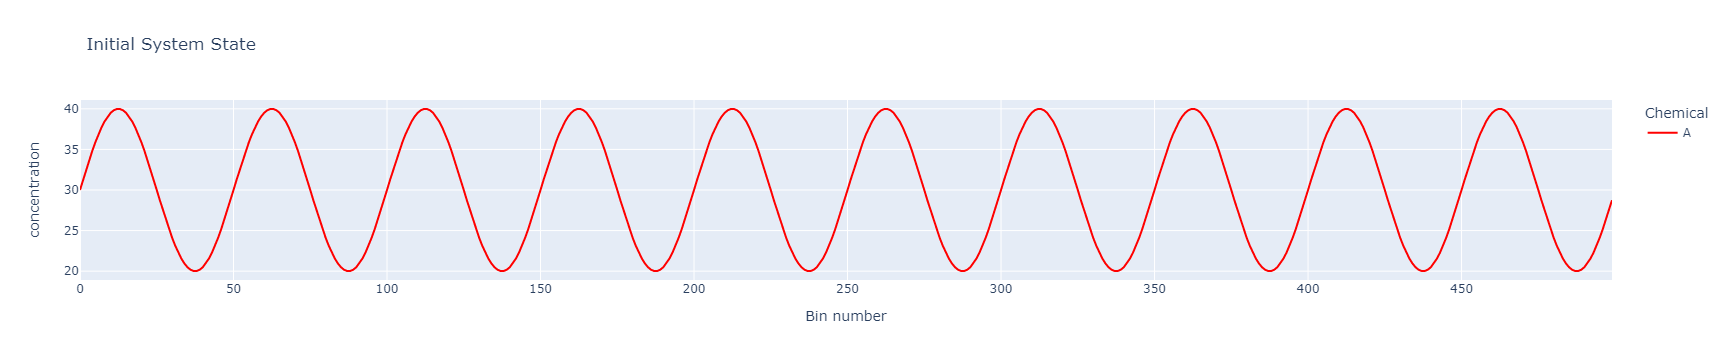

In [29]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Initial System State",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

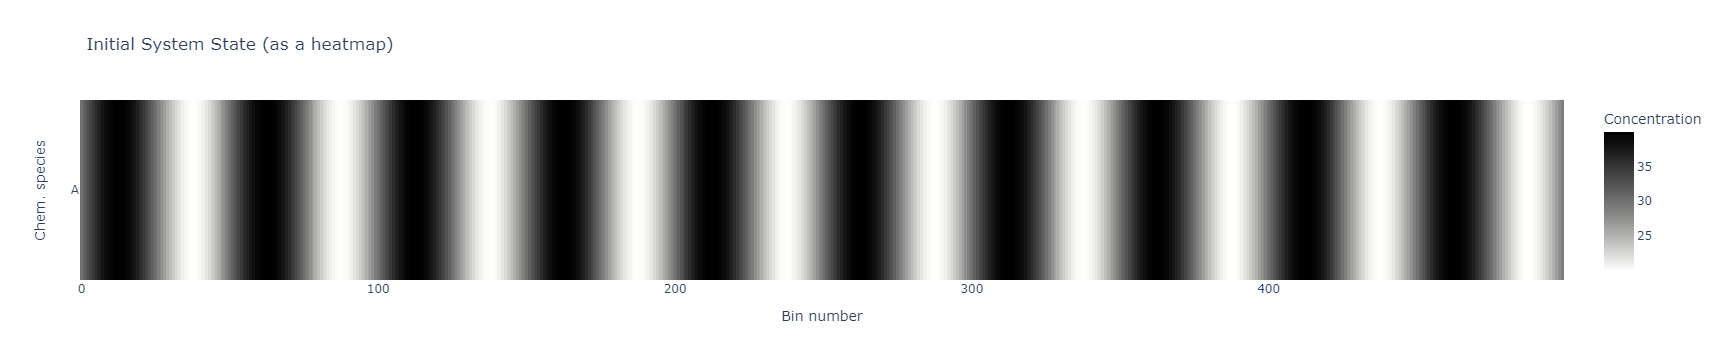

In [30]:
# Show as heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= "Initial System State (as a heatmap)", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r") 

fig.data[0].xgap=0
fig.data[0].ygap=0

fig.show()

In [31]:
# Take a look at the frequency domain of the concentration values
frequency_data = bio.frequency_analysis(species_name="A")
frequency_data

Frequency  Relative Amplitude
0        0.0                 3.0
1       10.0                 1.0

In [32]:
ratio = frequency_data.loc[1, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
ratio

0.3333333333333333

In [33]:
bio.add_snapshot(data_snapshot={"ratio": ratio})
bio.get_history()

SYSTEM TIME     ratio caption
0            0  0.333333

In [34]:
bio.diffuse(total_duration=10, n_steps=100)

{'steps': 100}

In [35]:
# Take a look at the frequency domain of the concentration values
frequency_data = bio.frequency_analysis(species_name="A")
frequency_data.loc[10]

Frequency               10.000000
Relative Amplitude    8721.103713
Name: 10, dtype: float64

In [36]:
ratio = frequency_data.loc[10, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
ratio

0.30839073632101904

In [37]:
bio.add_snapshot(data_snapshot={"ratio": ratio})
bio.get_history()

SYSTEM TIME     ratio caption
0          0.0  0.333333        
1         10.0  0.308391

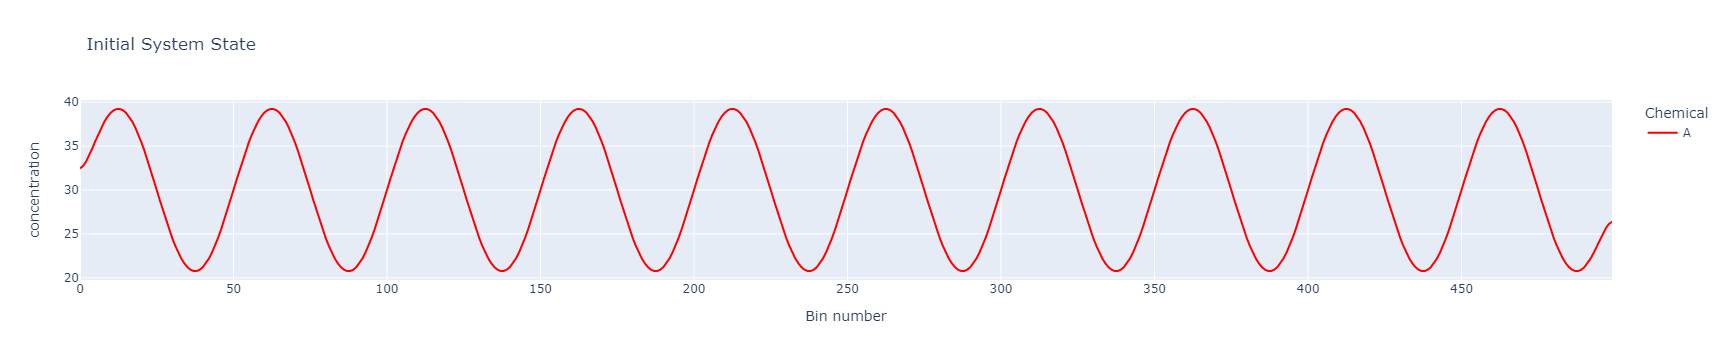

In [38]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= "Initial System State",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

In [39]:
for i in range(4):
    bio.diffuse(total_duration=10, n_steps=100)
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[10, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

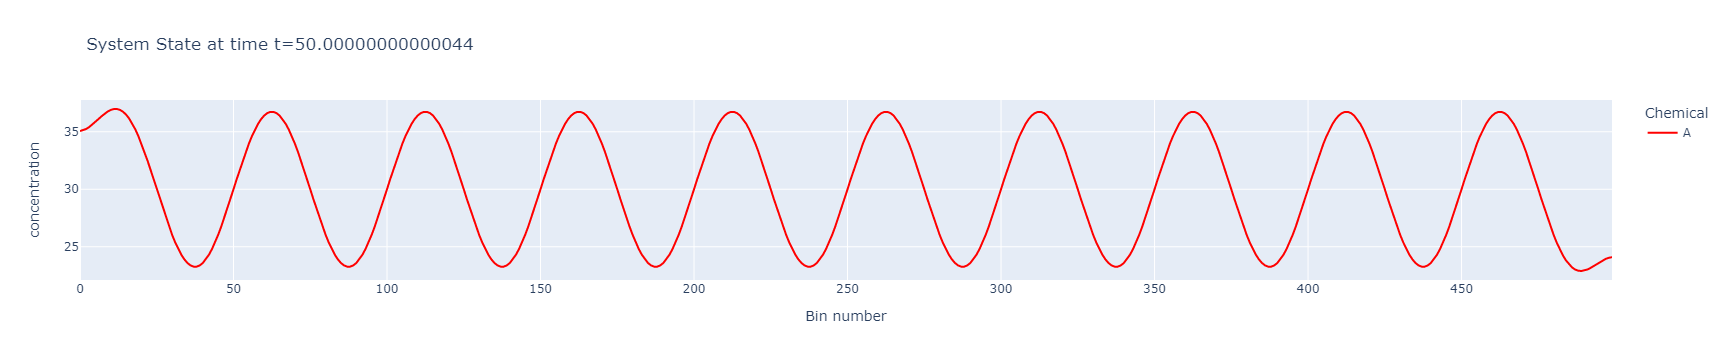

In [40]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"System State at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

In [41]:
bio.get_history()

SYSTEM TIME     ratio caption
0          0.0  0.333333        
1         10.0  0.308391        
2         20.0  0.285576        
3         30.0  0.264622        
4         40.0  0.245345        
5         50.0  0.227592

In [42]:
for i in range(10):
    bio.diffuse(total_duration=10, n_steps=100)
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[10, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

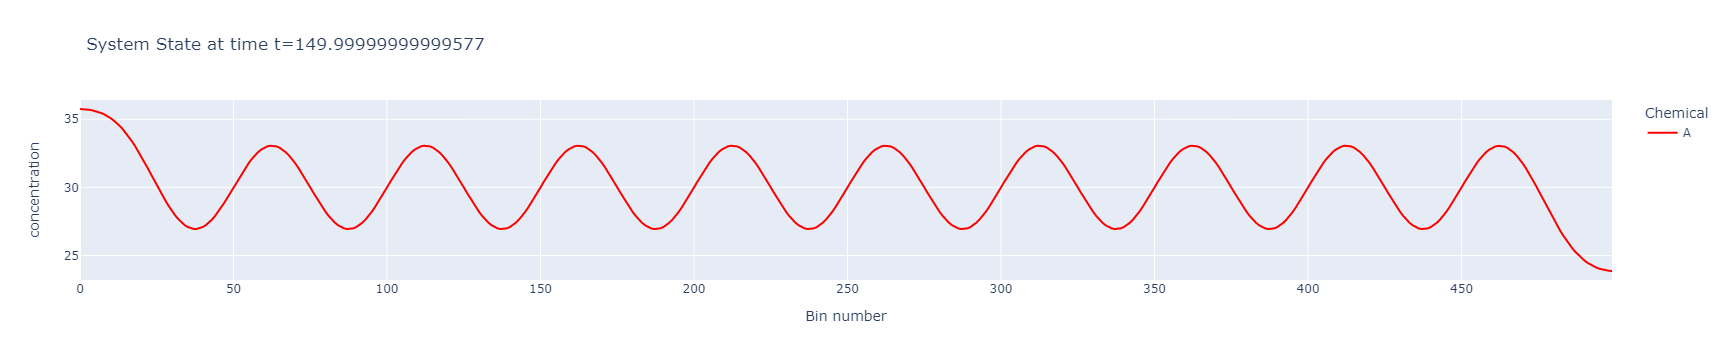

In [43]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"System State at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

In [44]:
bio.get_history()

SYSTEM TIME     ratio caption
0           0.0  0.333333        
1          10.0  0.308391        
2          20.0  0.285576        
3          30.0  0.264622        
4          40.0  0.245345        
5          50.0  0.227592        
6          60.0  0.211230        
7          70.0  0.196140        
8          80.0  0.182216        
9          90.0  0.169363        
10        100.0  0.157493        
11        110.0  0.146526        
12        120.0  0.136390        
13        130.0  0.127020        
14        140.0  0.118354        
15        150.0  0.110337

In [45]:
for i in range(35):
    bio.diffuse(total_duration=10, n_steps=100)
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[10, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

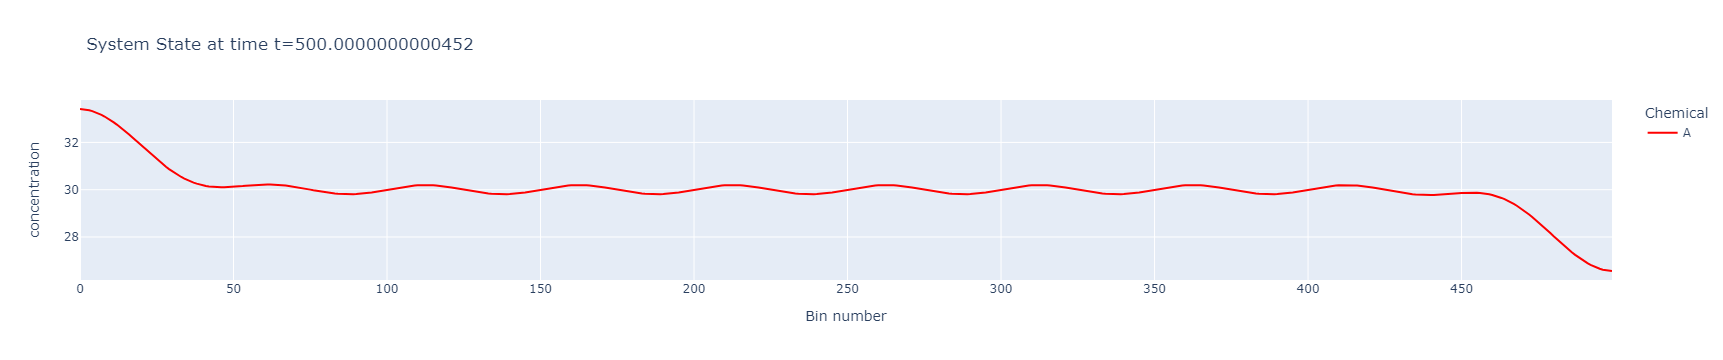

In [46]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"System State at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

In [47]:
bio.get_history()

SYSTEM TIME     ratio caption
0           0.0  0.333333        
1          10.0  0.308391        
2          20.0  0.285576        
3          30.0  0.264622        
4          40.0  0.245345        
5          50.0  0.227592        
6          60.0  0.211230        
7          70.0  0.196140        
8          80.0  0.182216        
9          90.0  0.169363        
10        100.0  0.157493        
11        110.0  0.146526        
12        120.0  0.136390        
13        130.0  0.127020        
14        140.0  0.118354        
15        150.0  0.110337        
16        160.0  0.102919        
17        170.0  0.096052        
18        180.0  0.089695        
19        190.0  0.083806        
20        200.0  0.078351        
21        210.0  0.073296        
22        220.0  0.068611        
23        230.0  0.064267        
24        240.0  0.060238        
25        250.0  0.056500        
26        260.0  0.053032        
27        270.0  0.049813        
28        280.0  0.046824        
29        290.0  0.044048        
30        300.0  0.041469        
31        310.0  0.039073        
32        320.0  0.036846        
33        330.0  0.034775        
34        340.0  0.032849        
35        350.0  0.031057        
36        360.0  0.029389        
37        370.0  0.027836        
38        380.0  0.026390        
39        390.0  0.025043        
40        400.0  0.023788        
41        410.0  0.022618        
42        420.0  0.021526        
43        430.0  0.020508        
44        440.0  0.019558        
45        450.0  0.018671        
46        460.0  0.017842        
47        470.0  0.017068        
48        480.0  0.016345        
49        490.0  0.015668        
50        500.0  0.015035

In [48]:
for i in range(50):
    bio.diffuse(total_duration=10, n_steps=100)
    frequency_data = bio.frequency_analysis(species_name="A")
    ratio = frequency_data.loc[10, "Relative Amplitude"] / frequency_data.loc[0, "Relative Amplitude"]
    bio.add_snapshot(data_snapshot={"ratio": ratio})

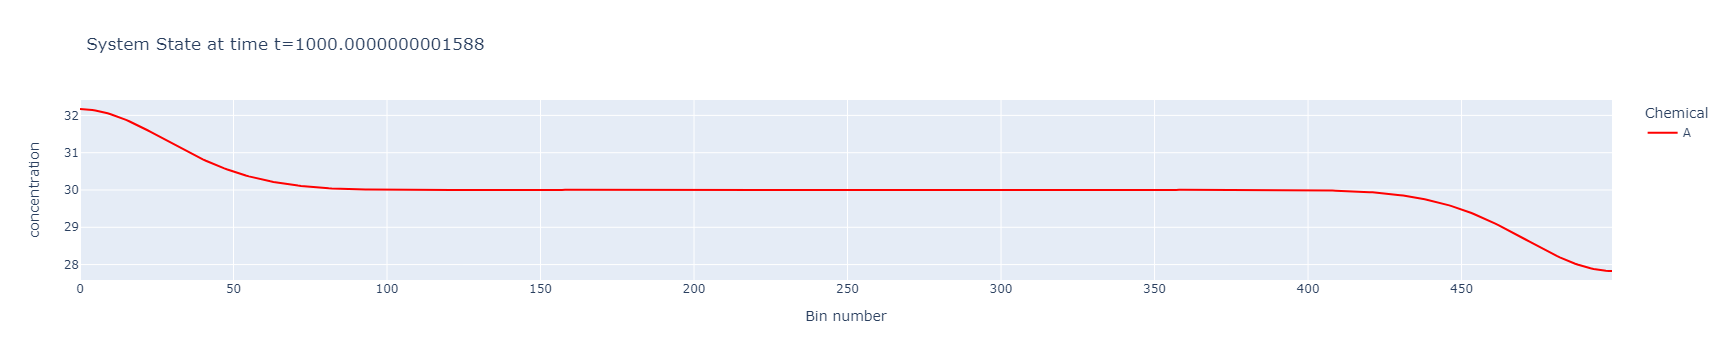

In [49]:
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"System State at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

**Most of the concentration graph is now flat as a board!**

In [50]:
bio.get_history()

SYSTEM TIME     ratio caption
0            0.0  0.333333        
1           10.0  0.308391        
2           20.0  0.285576        
3           30.0  0.264622        
4           40.0  0.245345        
..           ...       ...     ...
96         960.0  0.005431        
97         970.0  0.005376        
98         980.0  0.005324        
99         990.0  0.005273        
100       1000.0  0.005224        

[101 rows x 3 columns]

## Like done earlier for the smaller frequency, let's look how the amplitude of the sine signal, relative to the constant bias, changed over time

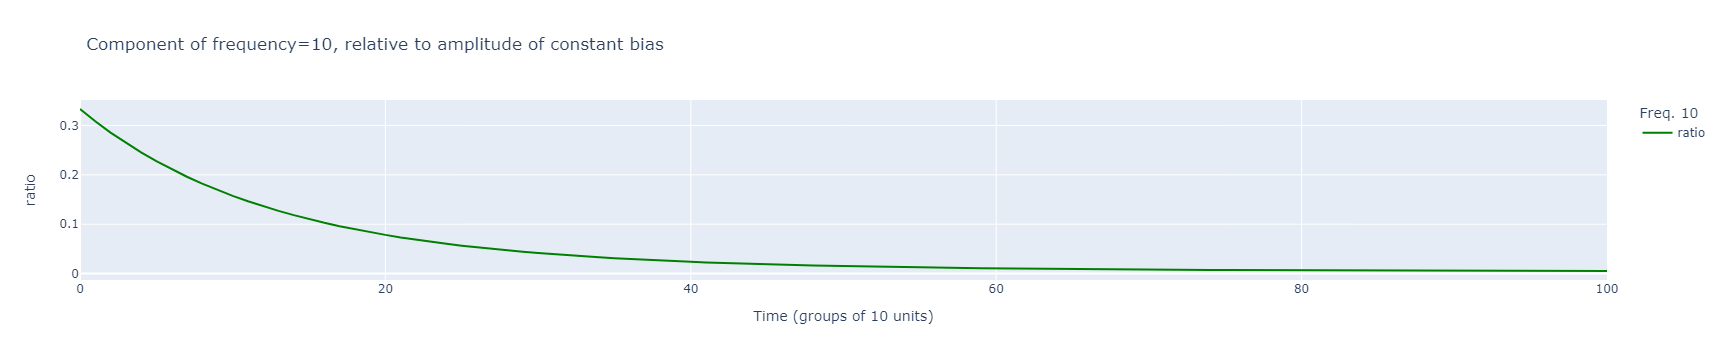

In [51]:
fig = px.line(data_frame=bio.get_history(), y=["ratio"], 
          title= "Component of frequency=10, relative to amplitude of constant bias",
          color_discrete_sequence = ['green'],
          labels={"value":"ratio", "variable":"Freq. 10", "index":"Time (groups of 10 units)"})
fig.show()

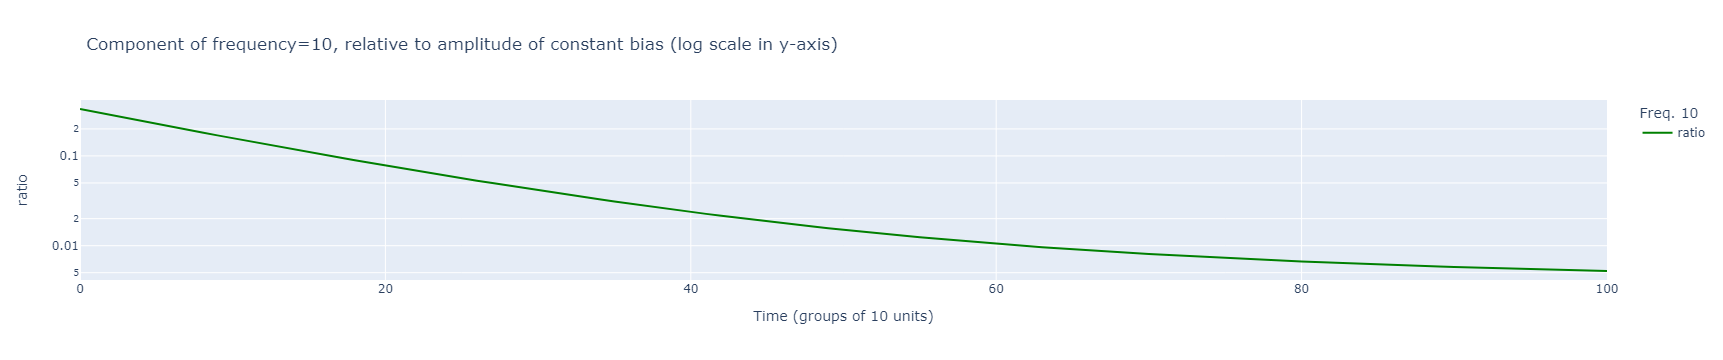

In [52]:
fig = px.line(data_frame=bio.get_history(), y=["ratio"], 
              title= "Component of frequency=10, relative to amplitude of constant bias (log scale in y-axis)",
              color_discrete_sequence = ['green'],
              labels={"value":"ratio", "variable":"Freq. 10", "index":"Time (groups of 10 units)"},
              log_y=True)
fig.show()

### Resurrect the earlier plot for frequency=2 (using a saved dataset)
### and then superpose them

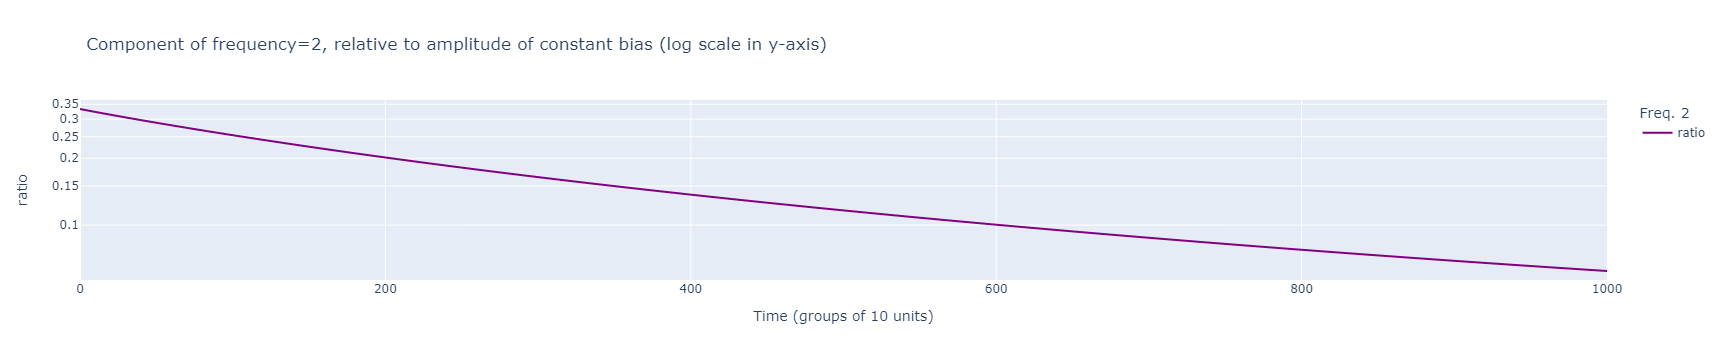

In [53]:
fig_2 = px.line(data_frame=saved_freq_2_df, y=["ratio"], 
              title= "Component of frequency=2, relative to amplitude of constant bias (log scale in y-axis)",
              color_discrete_sequence = ['purple'],
              labels={"value":"ratio", "variable":"Freq. 2", "index":"Time (groups of 10 units)"},
              log_y=True)
fig_2.show()

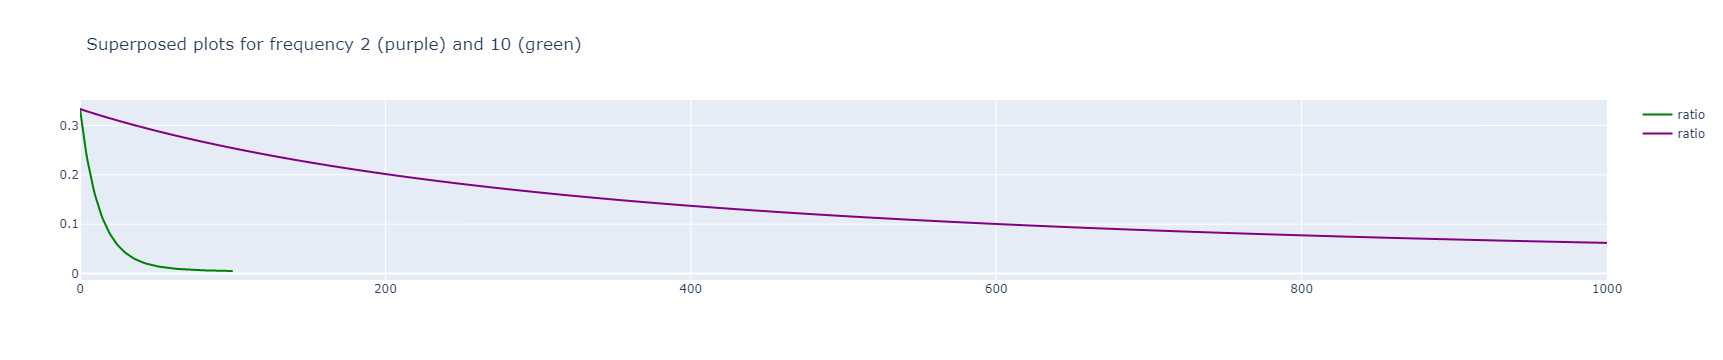

In [54]:
# Combine the last 2 plots
all_fig = go.Figure(data=fig.data + fig_2.data)    # Note that the + is concatenating lists
all_fig.update_layout(title="Superposed plots for frequency 2 (purple) and 10 (green)")
all_fig.show()

## Note how more more substantial the attenuation of the higher frequency (green) is!